In [23]:
# need to read dta (stata) file in python first
# install pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import grangercausalitytests

In [24]:
# load dta file
ftse = pd.read_stata("ftse100-1.dta")
exchange = pd.read_stata("exchange-2.dta")

In [25]:
# view datasets
ftse

,date,ftse100
0,2016-06-22,6261.189941
1,2016-06-23,6338.100098
2,2016-06-24,6138.689941
3,2016-06-27,5982.200195
4,2016-06-28,6140.390137
...,...,...
1180,2021-02-19,6624.000000
1181,2021-02-22,6612.200195
1182,2021-02-23,6625.899902
1183,2021-02-24,6659.000000


In [26]:
# view structure of ftse and exchange.
# note they are both float32. i.e., numbers
ftse.info()
exchange.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1185 entries, 0 to 1184
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     1185 non-null   datetime64[ns]
 1   ftse100  1184 non-null   float32       
dtypes: datetime64[ns](1), float32(1)
memory usage: 23.1 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1222 entries, 0 to 1221
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      1222 non-null   datetime64[ns]
 1   exchange  1200 non-null   float32       
dtypes: datetime64[ns](1), float32(1)
memory usage: 23.9 KB


In [27]:
# merge the two datasets
exchangestock = pd.merge(ftse,exchange)
exchangestock

,date,ftse100,exchange
0,2016-06-22,6261.189941,1.30368
1,2016-06-23,6338.100098,1.30520
2,2016-06-24,6138.689941,1.28443
3,2016-06-27,5982.200195,1.21788
4,2016-06-28,6140.390137,1.20121
...,...,...,...
1180,2021-02-19,6624.000000,1.15505
1181,2021-02-22,6612.200195,1.15701
1182,2021-02-23,6625.899902,1.15630
1183,2021-02-24,6659.000000,1.16171


In [28]:
# double check df is sorted by date
exchangestock.sort_values("date")

,date,ftse100,exchange
0,2016-06-22,6261.189941,1.30368
1,2016-06-23,6338.100098,1.30520
2,2016-06-24,6138.689941,1.28443
3,2016-06-27,5982.200195,1.21788
4,2016-06-28,6140.390137,1.20121
...,...,...,...
1180,2021-02-19,6624.000000,1.15505
1181,2021-02-22,6612.200195,1.15701
1182,2021-02-23,6625.899902,1.15630
1183,2021-02-24,6659.000000,1.16171


In [29]:
exchangestock.index = pd.to_datetime(exchangestock.index)
print(exchangestock)

                                    date      ftse100  exchange
1970-01-01 00:00:00.000000000 2016-06-22  6261.189941   1.30368
1970-01-01 00:00:00.000000001 2016-06-23  6338.100098   1.30520
1970-01-01 00:00:00.000000002 2016-06-24  6138.689941   1.28443
1970-01-01 00:00:00.000000003 2016-06-27  5982.200195   1.21788
1970-01-01 00:00:00.000000004 2016-06-28  6140.390137   1.20121
...                                  ...          ...       ...
1970-01-01 00:00:00.000001180 2021-02-19  6624.000000   1.15505
1970-01-01 00:00:00.000001181 2021-02-22  6612.200195   1.15701
1970-01-01 00:00:00.000001182 2021-02-23  6625.899902   1.15630
1970-01-01 00:00:00.000001183 2021-02-24  6659.000000   1.16171
1970-01-01 00:00:00.000001184 2021-02-25  6652.000000   1.16233

[1185 rows x 3 columns]


In [30]:
# fix these unnesseary additions
exchangestock = exchangestock.reset_index(drop=True)
print(exchangestock)

           date      ftse100  exchange
0    2016-06-22  6261.189941   1.30368
1    2016-06-23  6338.100098   1.30520
2    2016-06-24  6138.689941   1.28443
3    2016-06-27  5982.200195   1.21788
4    2016-06-28  6140.390137   1.20121
...         ...          ...       ...
1180 2021-02-19  6624.000000   1.15505
1181 2021-02-22  6612.200195   1.15701
1182 2021-02-23  6625.899902   1.15630
1183 2021-02-24  6659.000000   1.16171
1184 2021-02-25  6652.000000   1.16233

[1185 rows x 3 columns]


In [31]:
# convert date variable to datetime type
exchangestock['date'] = pd.to_datetime(exchangestock['date'])

# set date column as the index
exchangestock = exchangestock.set_index('date')

In [32]:
# define pandemic start date
pandemic = pd.to_datetime('2020-02-21')

In [33]:
# calculate statistics for pre-pandemic and pandemic periods
pre_pandemic_stats = exchangestock[exchangestock.index < pandemic].describe()
pandemic_stats = exchangestock[exchangestock.index >= pandemic].describe()
print(pre_pandemic_stats)
print(pandemic_stats)

           ftse100    exchange
count   929.000000  907.000000
mean   7269.801270    1.143870
std     288.260620    0.028303
min    5982.200195    1.072430
25%    7107.200195    1.123650
50%    7317.399902    1.139760
75%    7482.500000    1.165530
max    7877.450195    1.305200
           ftse100    exchange
count   255.000000  256.000000
mean   6155.143066    1.117841
std     392.368591    0.021140
min    4993.899902    1.060330
25%    5900.250000    1.103523
50%    6123.700195    1.112345
75%    6469.500000    1.129338
max    7403.899902    1.195040


In [34]:
# create index variables
base = '2020-02-21'
base_values = exchangestock.loc[base]

exchangestock['ftse100_index'] = (exchangestock['ftse100'] / base_values['ftse100']) * 100
exchangestock['exchange_index'] = (exchangestock['exchange'] / base_values['exchange']) * 100

<Figure size 1200x600 with 0 Axes>

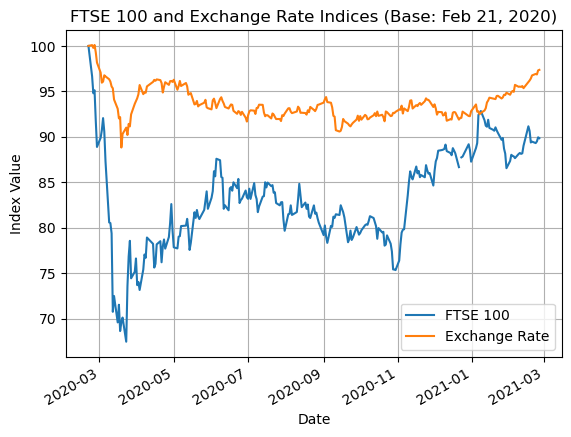

In [35]:
# plot index variables
plt.figure(figsize=(12, 6))
exchangestock[exchangestock.index >= pandemic][['ftse100_index', 'exchange_index']].plot()
plt.title('FTSE 100 and Exchange Rate Indices (Base: Feb 21, 2020)')
plt.legend(['FTSE 100', 'Exchange Rate'])
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Index Value')

plt.show()

In [36]:
# find correlation for both periods
# **improve, I want significance levels too**
pre_pandemic_corr = exchangestock[exchangestock.index < pandemic][['ftse100', 'exchange']].corr()
pandemic_corr = exchangestock[exchangestock.index >= pandemic][['ftse100', 'exchange']].corr()
print(pre_pandemic_corr)
print(pandemic_corr)

           ftse100  exchange
ftse100   1.000000 -0.309957
exchange -0.309957  1.000000
           ftse100  exchange
ftse100   1.000000  0.344543
exchange  0.344543  1.000000


In [37]:
# log transformation
exchangestock['lftse100'] = np.log(exchangestock['ftse100'])
exchangestock['lexchange'] = np.log(exchangestock['exchange'])

In [38]:
# perform alternate dickey-fuller (adf) test to test for unit root

def perform_adf_test(series):
    result = adfuller(series, autolag='AIC')
    return {
        'Test Statistic':result[0],
        'p-value': result[1],
        'Critical value': result[4]
    }

In [39]:
# I have missing variables. Count them
print(clean_pandemic_data.isna().sum().sum())

0


In [44]:
# try again
pandemic_data = exchangestock[exchangestock.index >= pandemic]
adf_lftse = perform_adf_test(clean_pandemic_data['lftse100'])
adf_lexchange = perform_adf_test(clean_pandemic_data['lexchange'])
clean_pandemic_data = pandemic_data.dropna()

In [45]:
# create first difference
exchangestock['dlftse100'] = exchangestock['lftse100'].diff()
exchangestock['dlexchange'] = exchangestock['lexchange'].diff()

In [46]:
# prep data for var
clean_pandemic_data = exchangestock[exchangestock.index >= pandemic].dropna()
var_data = clean_pandemic_data[['dlftse100', 'dlexchange']]

In [47]:
# find optimal lag period
model = VAR(var_data)
lag_order = model.select_order()

C:\Users\Elliot\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [48]:
# fitted var model
var_fitted = model.fit(maxlags=lag_order.selected_orders['aic'])

In [49]:
# granger casuality
from statsmodels.tsa.stattools import grangercausalitytests

gc_test_exchange_to_ftse = grangercausalitytests(var_data[['dlftse100', 'dlexchange']], maxlag=lag_order.selected_orders['aic'])
gc_test_ftse_to_exchange = grangercausalitytests(var_data[['dlexchange', 'dlftse100']], maxlag=lag_order.selected_orders['aic'])


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6772  , p=0.4114  , df_denom=250, df_num=1
ssr based chi2 test:   chi2=0.6853  , p=0.4078  , df=1
likelihood ratio test: chi2=0.6844  , p=0.4081  , df=1
parameter F test:         F=0.6772  , p=0.4114  , df_denom=250, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2404  , p=0.7865  , df_denom=247, df_num=2
ssr based chi2 test:   chi2=0.4905  , p=0.7825  , df=2
likelihood ratio test: chi2=0.4901  , p=0.7827  , df=2
parameter F test:         F=0.2404  , p=0.7865  , df_denom=247, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.3254  , p=0.8070  , df_denom=244, df_num=3
ssr based chi2 test:   chi2=1.0042  , p=0.8002  , df=3
likelihood ratio test: chi2=1.0022  , p=0.8007  , df=3
parameter F test:         F=0.3254  , p=0.8070  , df_denom=244, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.2848  , p=0.8877  

In [54]:
# repeat VAR and Granger causality analysis for pre-pandemic period
pre_pandemic_data = exchangestock[exchangestock.index < pandemic].dropna()
pre_pandemic_var_data = pre_pandemic_data[['dlftse100', 'dlexchange']]

pre_model = VAR(pre_pandemic_var_data)
pre_lag_order = pre_model.select_order()
pre_var_fitted = pre_model.fit(maxlags=pre_lag_order.selected_orders['aic'])

C:\Users\Elliot\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [56]:
# granger test 2
pre_gc_test_exchange_to_ftse = grangercausalitytests(pre_pandemic_var_data[['dlftse100', 'dlexchange']], maxlag=pre_lag_order.selected_orders['aic'])
pre_gc_test_ftse_to_exchange = grangercausalitytests(pre_pandemic_var_data[['dlexchange', 'dlftse100']], maxlag=pre_lag_order.selected_orders['aic'])


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.1986  , p=0.1385  , df_denom=898, df_num=1
ssr based chi2 test:   chi2=2.2059  , p=0.1375  , df=1
likelihood ratio test: chi2=2.2032  , p=0.1377  , df=1
parameter F test:         F=2.1986  , p=0.1385  , df_denom=898, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=9.1462  , p=0.0026  , df_denom=898, df_num=1
ssr based chi2 test:   chi2=9.1767  , p=0.0025  , df=1
likelihood ratio test: chi2=9.1303  , p=0.0025  , df=1
parameter F test:         F=9.1462  , p=0.0026  , df_denom=898, df_num=1
